<a href="https://colab.research.google.com/github/ulalithap/My_Projects/blob/main/Disaster_Tweet_classifyNB_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:

import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import nltk,re,string
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn import model_selection
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,f1_score,precision_score,confusion_matrix,recall_score,roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression

from sklearn.naive_bayes import MultinomialNB, GaussianNB
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('all')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]

True

In [2]:
df=pd.read_csv('disaster_tweets.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


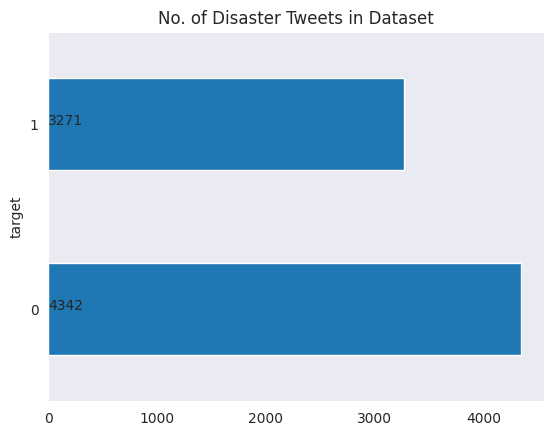

In [11]:
#sns.set_style('dark')
#sns.countplot(df.target)
t=df["target"].value_counts().plot(kind="barh" )
for i,j in enumerate(df["target"].value_counts().values):
    t.text(1.5,i,j,fontsize=10)
t.set(title = 'No. of Disaster Tweets in Dataset')
plt.show()

In [12]:
df['length']=df['text'].apply(len)
df.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


<ipython-input-15-6215b268238c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax= sns.distplot(df['length'], rug=True)


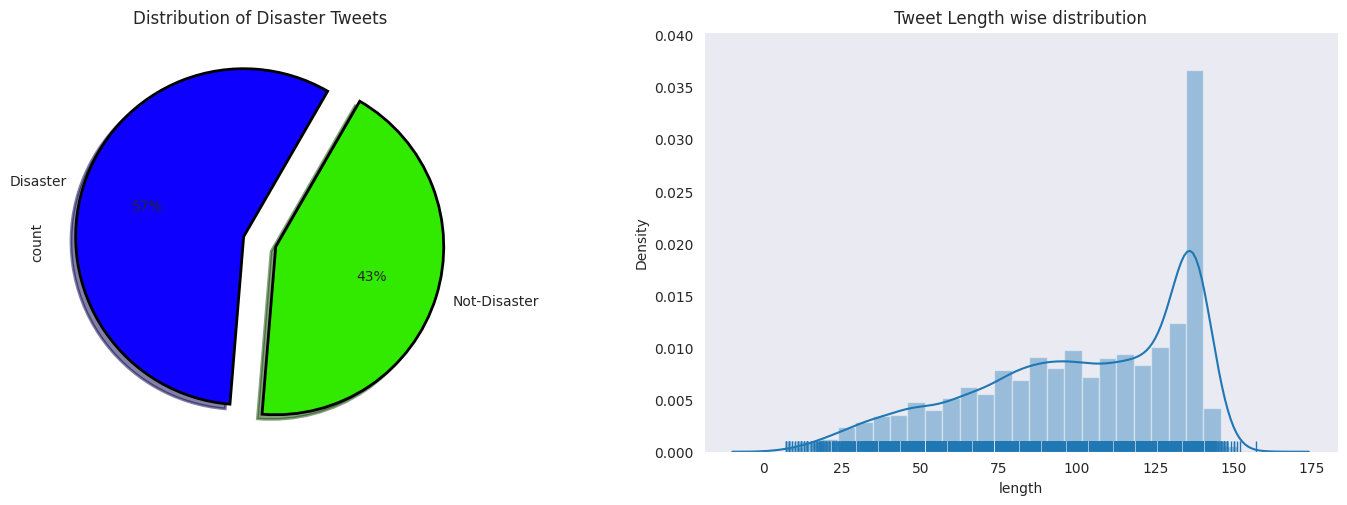

In [15]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df["target"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Disaster","Not-Disaster"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Disaster Tweets")
plt.subplot(222)
ax= sns.distplot(df['length'], rug=True)
plt.title("Tweet Length wise distribution")
plt.show()

In [32]:
dis_t=df[df.target==1]
dis_t.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


<ipython-input-33-eb4f6e3dc18d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax= sns.distplot(dis_t['length'], rug=True)
<ipython-input-33-eb4f6e3dc18d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax= sns.distplot(nondis_t['length'], rug=True)


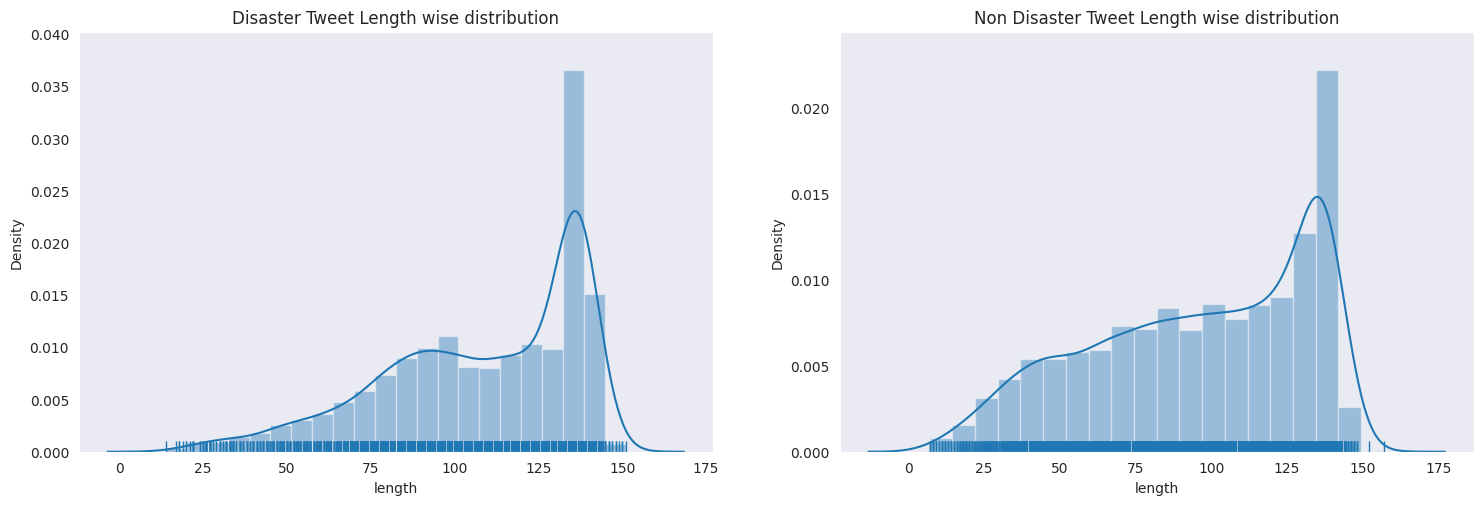

In [33]:
# distribution with/without disaster tweet length
dis_t=df[df.target==1]
nondis_t=df[df.target==0]
plt.figure(figsize=(18,12))
plt.subplot(221)
ax= sns.distplot(dis_t['length'], rug=True)
plt.title("Disaster Tweet Length wise distribution")
plt.subplot(222)
ax= sns.distplot(nondis_t['length'], rug=True)
plt.title("Non Disaster Tweet Length wise distribution")
plt.show()

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

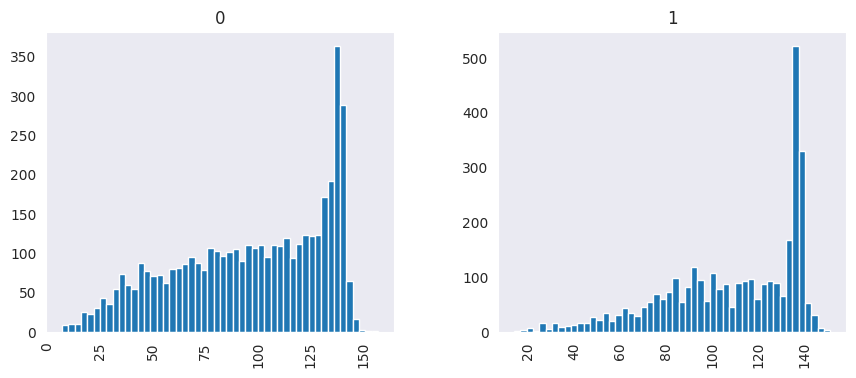

In [19]:
df.hist(column='length',by='target',bins=50,figsize=(10,4))

In [22]:
df['text'][7000]

'HAPPY 24 TWISTER!!! Thank you for all the laughs sticking by my side no matter what and also for\x89Û_ https://t.co/ttq9IlHp8W'

In [24]:
stop=set(stopwords.words('english'))
punctuation=list(string.punctuation)
stop.update(punctuation)

def remove_stopwords(text):
    final_text=[]
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

dis_t=dis_t['text'].apply(remove_stopwords)
nondis_t=nondis_t['text'].apply(remove_stopwords)

In [34]:
dis_t.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


Text(0.5, 1.0, 'wordccloud for Disaster Tweets')

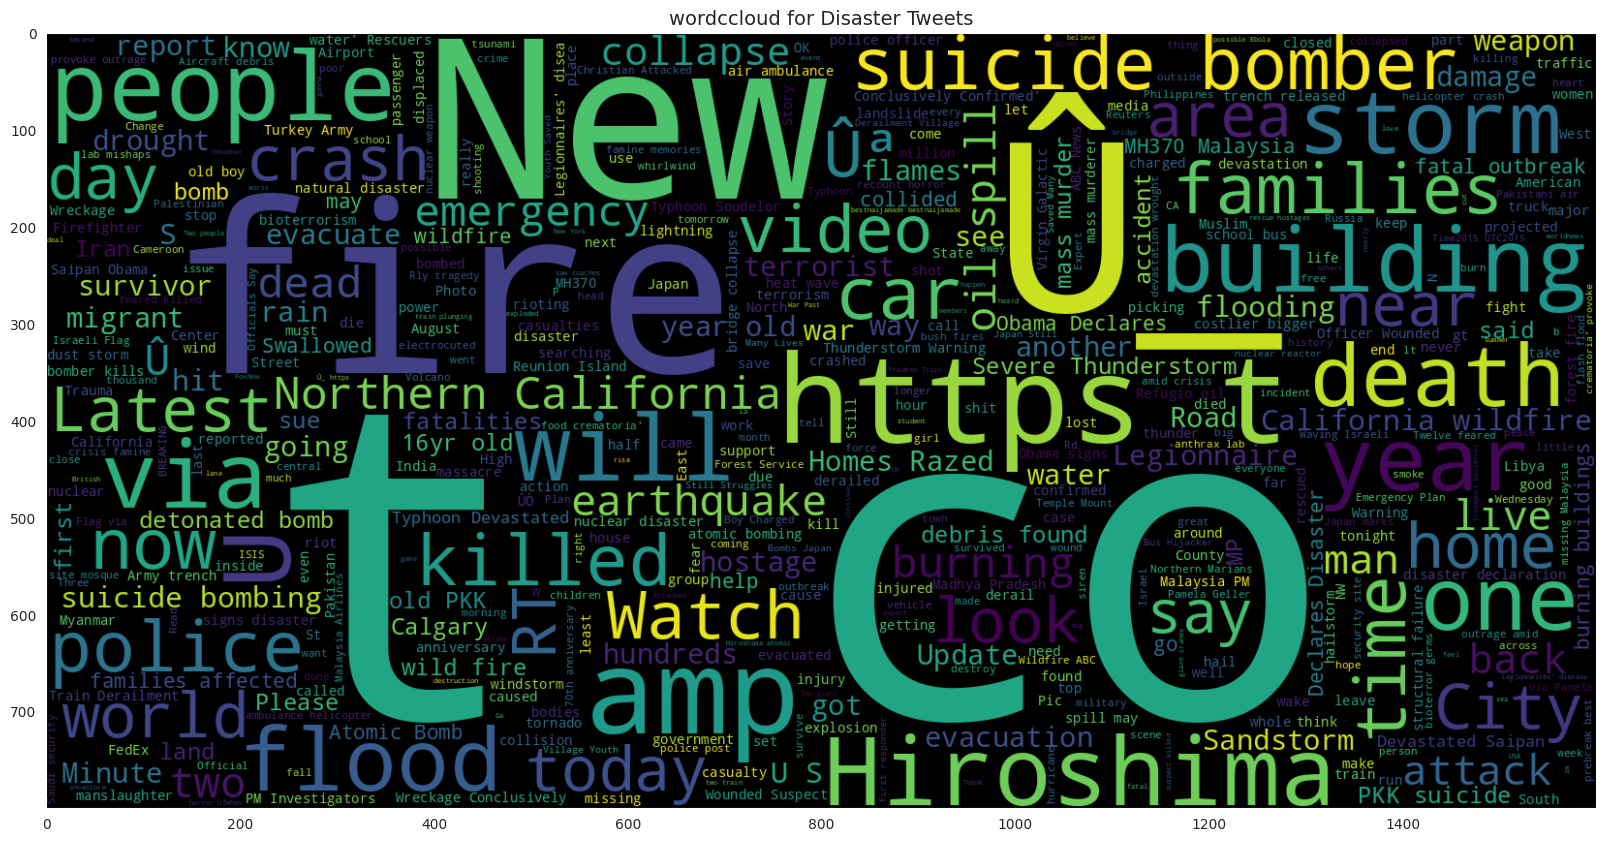

In [36]:
#plot word clouds
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500,width=1600,height=800).generate(" ".join(dis_t.text))
plt.imshow(wc,interpolation='bilinear')
plt.title('wordccloud for Disaster Tweets',fontsize=14)

Text(0.5, 1.0, 'wordccloud for Normal Tweets')

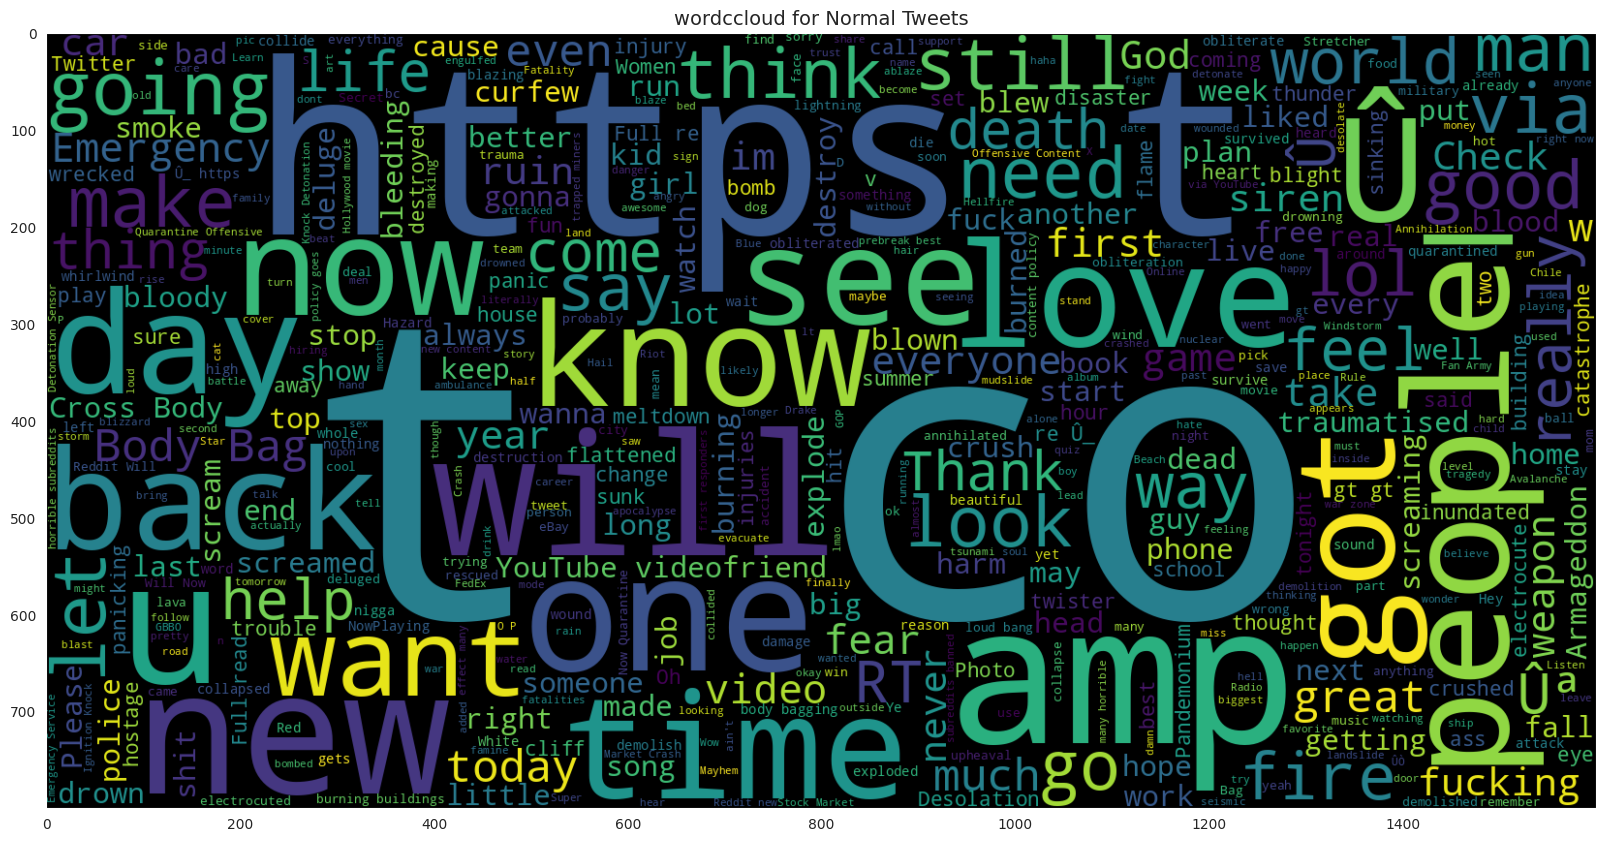

In [37]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500,width=1600,height=800).generate(" ".join(nondis_t.text))
plt.imshow(wc,interpolation='bilinear')
plt.title('wordccloud for Normal Tweets',fontsize=14)

In [47]:
# Data Cleaning and Preparation
lemma=WordNetLemmatizer()
stop=stopwords.words('english')

def cleanTweet(txt):
    txt=txt.lower()
    words=nltk.word_tokenize(txt)
    words=" ".join([lemma.lemmatize(word) for word in words if word not in (stop)])
    text="".join(words)
    txt=re.sub('[^a-z]',' ',text)
    return txt

In [48]:

df['cleaned_tweets']=df['text'].apply(cleanTweet)
df.head()

,id,keyword,location,text,target,length,cleaned_tweets
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,resident asked shelter place notified offic...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,people receive wildfire evacuation or...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,got sent photo ruby alaska smoke wildfire ...


In [49]:
y=df.target
X=df.cleaned_tweets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)


In [62]:
tfifd_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.8,ngram_range=(1,2))
tfidf_train_2=tfifd_vectorizer.fit_transform(X_train)
tfidf_test_2=tfifd_vectorizer.transform(X_test)

In [51]:
mnb_tf=MultinomialNB()
mnb_tf.fit(tfidf_train_2,y_train)

MultinomialNB()

In [52]:
kfold=model_selection.KFold(n_splits=10)
scoring='accuracy'
acc_mnb2=cross_val_score(estimator=mnb_tf,X=tfidf_train_2, y=y_train, cv=kfold,scoring=scoring)
acc_mnb2.mean()

0.7922824302134648

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score
0,NB Tfidf Bigram,0.858607,0.858607,0.640673,0.920598,0.7338


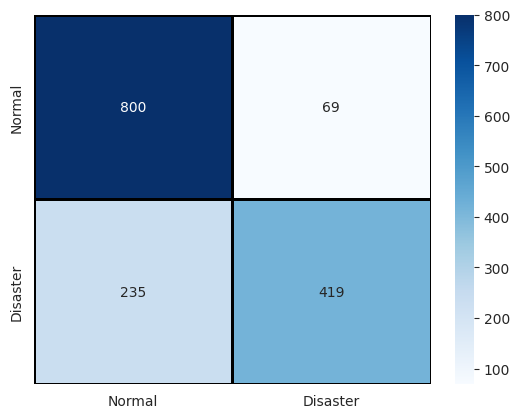

In [73]:
pred_mnb2 = mnb_tf.predict(tfidf_test_2)
CM=confusion_matrix(y_test,pred_mnb2)
sns.heatmap(CM,cmap='Blues',linecolor='black',linewidth=1,annot=True,fmt='',xticklabels=['Normal','Disaster'],yticklabels=['Normal','Disaster'])
TN=CM[0][0]
FN=CM[1][0]
TP=CM[1][1]
FP=CM[0][1]
specificity=TN/(TN+FP)
acc=precision_score(y_test,pred_mnb2)
prec=precision_score(y_test,pred_mnb2)
rec=recall_score(y_test,pred_mnb2)
f1=f1_score(y_test,pred_mnb2)

model_results=pd.DataFrame([['NB Tfidf Bigram',acc,prec,rec,specificity,f1]],columns=['Model','Accuracy','Precision','Sensitivity','Specificity','F1 Score'])
model_results

In [64]:
pass_tf=PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2,y_train)


PassiveAggressiveClassifier()

In [65]:
kfold=model_selection.KFold(n_splits=10)
scoring='accuracy'
acc_mnb2=cross_val_score(estimator=pass_tf,X=tfidf_train_2, y=y_train, cv=kfold,scoring=scoring)
acc_mnb2.mean()

0.7876847290640395

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score
0,Passive Aggressive- Tfidf Bigram,0.743243,0.743243,0.756881,0.803222,0.7500
0,NB Tfidf Bigram,0.858607,0.858607,0.640673,0.920598,0.7338


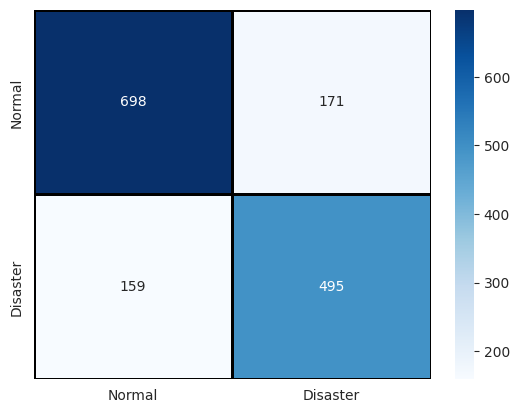

In [74]:
pred_pass= pass_tf.predict(tfidf_test_2)
CM=confusion_matrix(y_test,pred_pass)
sns.heatmap(CM,cmap='Blues',linecolor='black',linewidth=1,annot=True,fmt='',xticklabels=['Normal','Disaster'],yticklabels=['Normal','Disaster'])
TN=CM[0][0]
FN=CM[1][0]
TP=CM[1][1]
FP=CM[0][1]
specificity=TN/(TN+FP)
acc=precision_score(y_test,pred_pass)
prec=precision_score(y_test,pred_pass)
rec=recall_score(y_test,pred_pass)
f1=f1_score(y_test,pred_pass)

results=pd.DataFrame([['Passive Aggressive- Tfidf Bigram',acc,prec,rec,specificity,f1]],columns=['Model','Accuracy','Precision','Sensitivity','Specificity','F1 Score'])
#final=model_results.append(results,ignore_index=True)
final=pd.concat([results,model_results])
final

In [75]:
# repeat above with tri-grams

In [76]:
def most_informative_feature_for_binary_classification(vectorizer,classifier,n=100):
    class_labels=classifier.classes_
    feature_names=vectorizer.get_feature_names_out()
    topn_class1=sorted(zip(classifier.coef_[0],feature_names))[:n]
    topn_class2=sorted(zip(classifier.coef_[0],feature_names))[-n:]
    for coef, feat in topn_class1:
        print(class_labels[0],coef,feat)
    print()
    for coef, feat in reversed(topn_class2):
        print(class_labels[1],coef,feat)

In [77]:
most_informative_feature_for_binary_classification(tfifd_vectorizer,pass_tf,n=10)

0 -2.2138066049001788 dianneg
0 -2.2138066049001788 dianneg gunshot
0 -2.2138066049001788 rt dianneg
0 -2.166297816605963 hrqcjdovjz
0 -2.166297816605963 http hrqcjdovjz
0 -2.100572039989927 http trhjuau
0 -2.100572039989927 trhjuau
0 -1.9647787151541314 http zdbtktww
0 -1.9647787151541314 zdbtktww
0 -1.9596940508920977 love

1 3.878114259592789 hiroshima
1 3.524297411986153 http
1 3.39328346835657 california
1 3.240993241517807 temecafreeman gm
1 3.240993241517807 temecafreeman
1 3.177175940882635 wildfire
1 3.122778548503529 forest
1 3.048915009772317 bluebirddenver fettilootch
1 3.048915009772317 bluebirddenver
1 2.915349344814083 bombing


In [78]:
# Sample Prediction

In [80]:
sentences=['A terrible crash just happened','Heard aboout #EarthQuake in different cities','I dont like cold']
tfidf_bigram=tfifd_vectorizer.transform(sentences)
predictions=pass_tf.predict(tfidf_bigram)

for text,label in zip(sentences,predictions):
    if label==1:
        target='Disaster Tweet'
        print('text',text,'\nClass',target)
        print()
    else:
        target='Normal Tweet'
        print('text',text,'\nClass',target)
        print()

text A terrible crash just happened 
Class Disaster Tweet

text Heard aboout #EarthQuake in different cities 
Class Disaster Tweet

text I dont like cold 
Class Normal Tweet

